## Gurobi example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import solver_factory, ModelOptions

### Initialize Gwynt y Mor

In [2]:
locations = load_repository()

In [3]:
L = locations.gwynt
capacity = 6

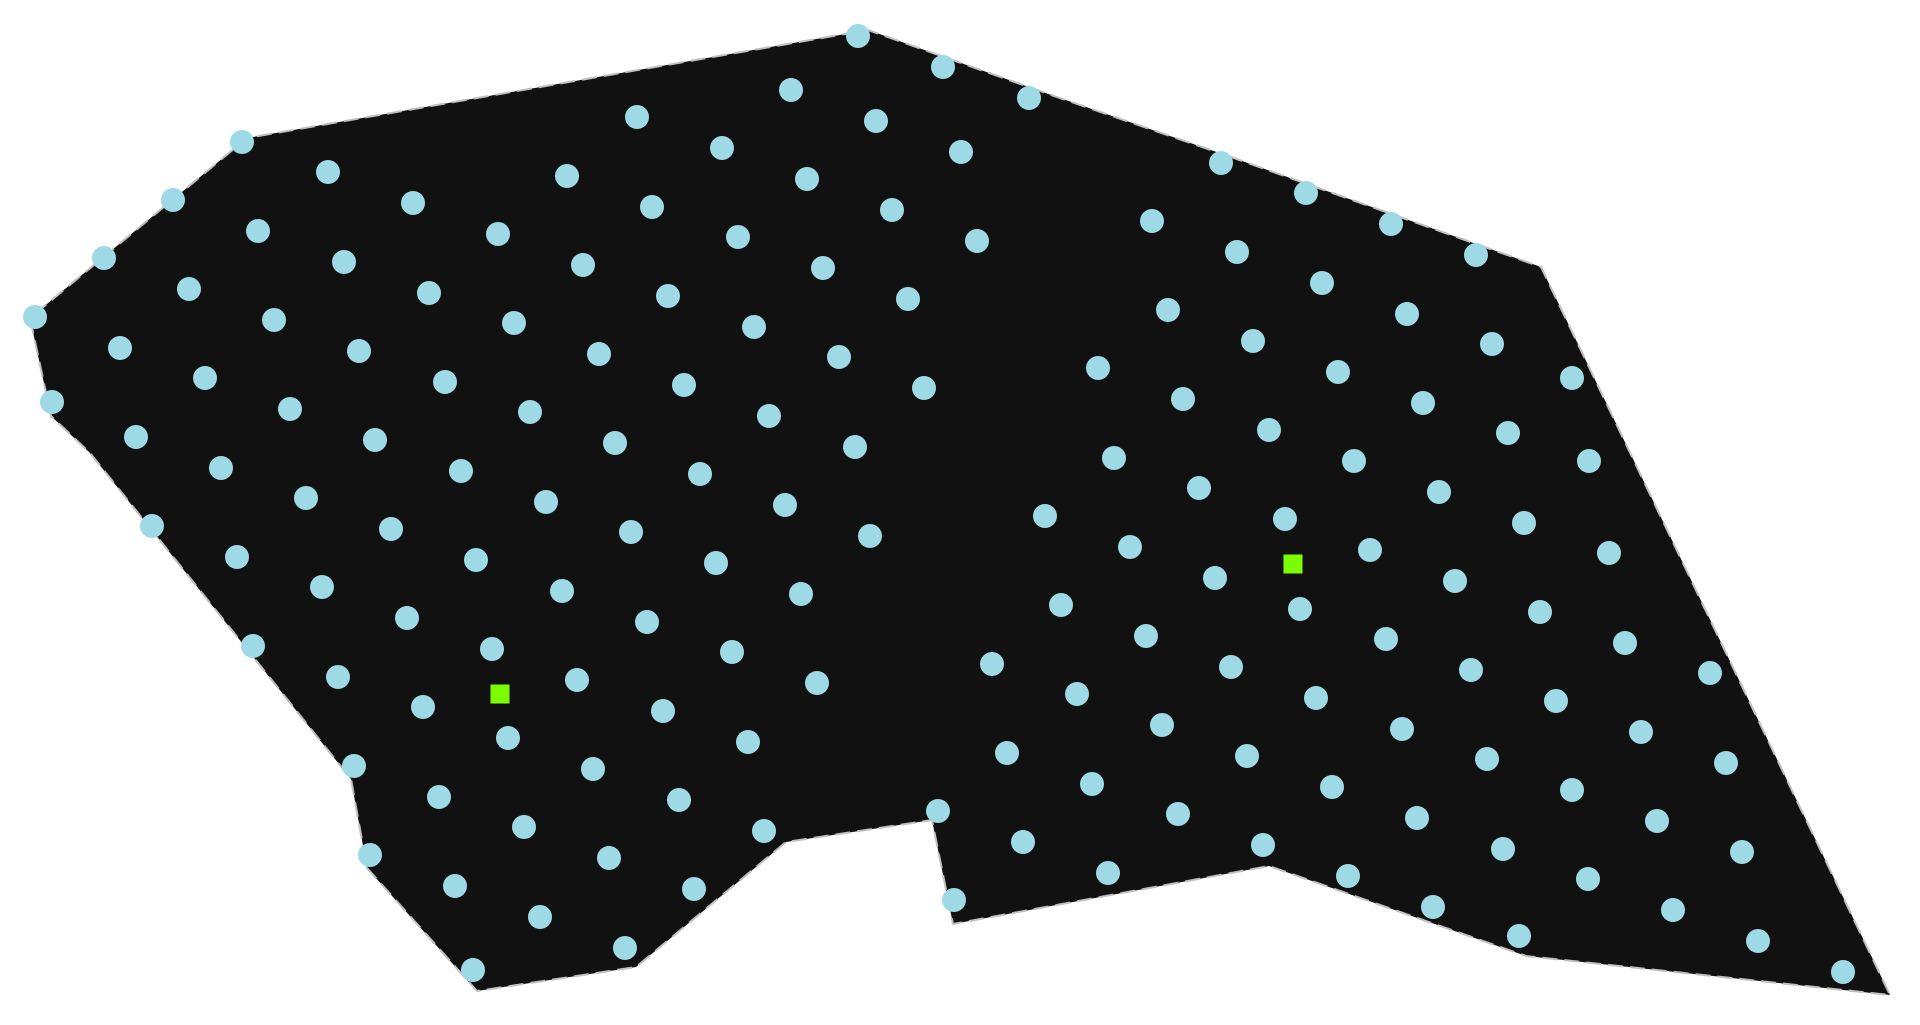

In [4]:
svgplot(L)

### Optimize Gwynt y Mor

In [5]:
P, A = make_planar_embedding(L)

Initial heuristic solution to warm-start the solver:

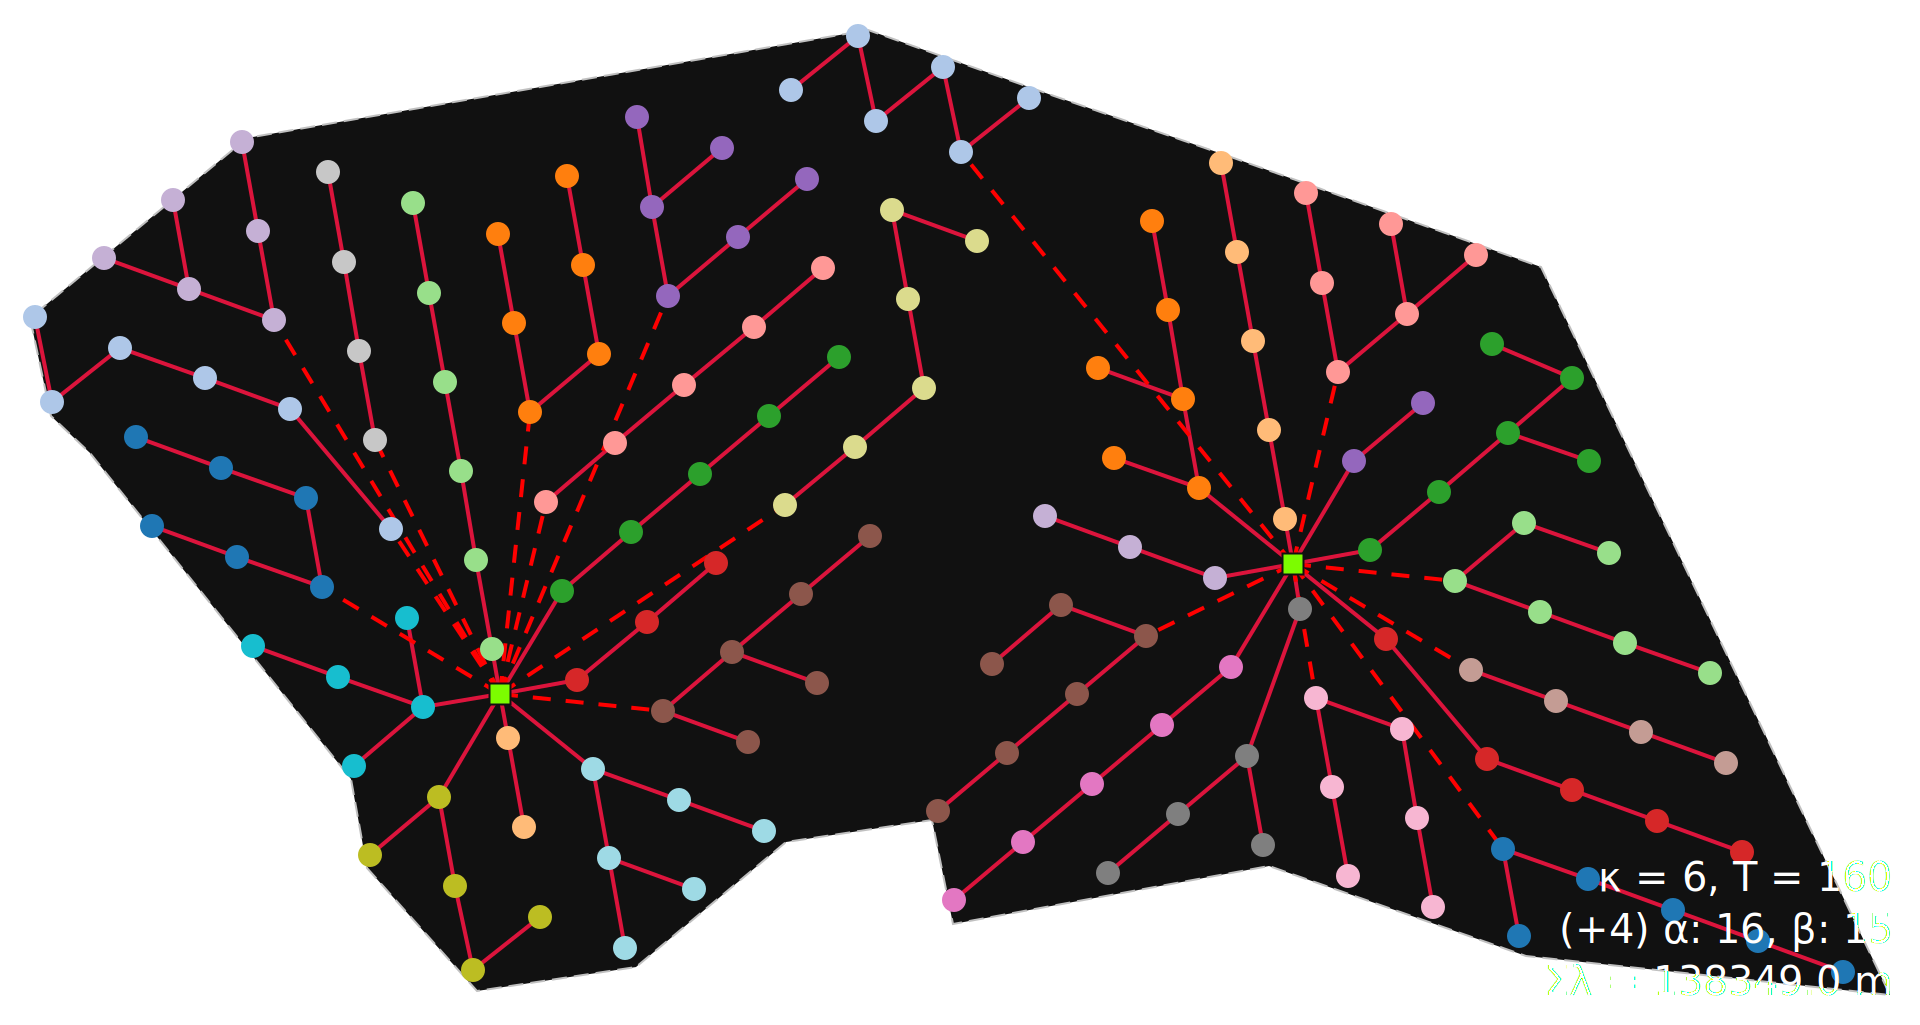

In [6]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [7]:
solver = solver_factory('gurobi')

In [8]:
solver.set_problem(
    P, A,
    capacity=Sʹ.graph['capacity'],
    model_options=ModelOptions(
        topology="branched",
        feeder_route="segmented",
        feeder_limit="unlimited",
    ),
    warmstart=Sʹ,
)

In [9]:
solver.solve(
    mip_gap=0.005,
    time_limit=90,
    verbose=True,
)

Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  90
MIPGap  0.005
MIPFocus  1

Academic license 937681 - for non-commercial use only - registered to ma___@dtu.dk
Optimize a model with 5938 rows, 3976 columns and 22544 nonzeros
Model fingerprint: 0x53addd12
Variable types: 0 continuous, 3976 integer (1988 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [4e+02, 1e+04]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 2e+02]

Loaded user MIP start with objective 138349

Presolve removed 757 rows and 0 columns
Presolve time: 0.03s
Presolved: 5181 rows, 3976 columns, 19044 nonzeros
Variable types: 0 continuous, 3976 integer (1988 binary)

Root relaxation: objective 1

SolutionInfo(runtime=90.14299988746643, bound=126599.11925224712, objective=128806.91198386771, relgap=0.01714032808966881, termination='maxTimeLimit')

The pyomo GurobiDirect class can work as context manager by passing the `manage_env=True` parameter to SolverFactory. Advantages of operating this way:
- the Gurobi license is released after the context's scope ends
- one can pass `options` that can only be set at the Gurobi environment creation (such as `threadlimit`)

In [10]:
S, G = solver.get_solution()

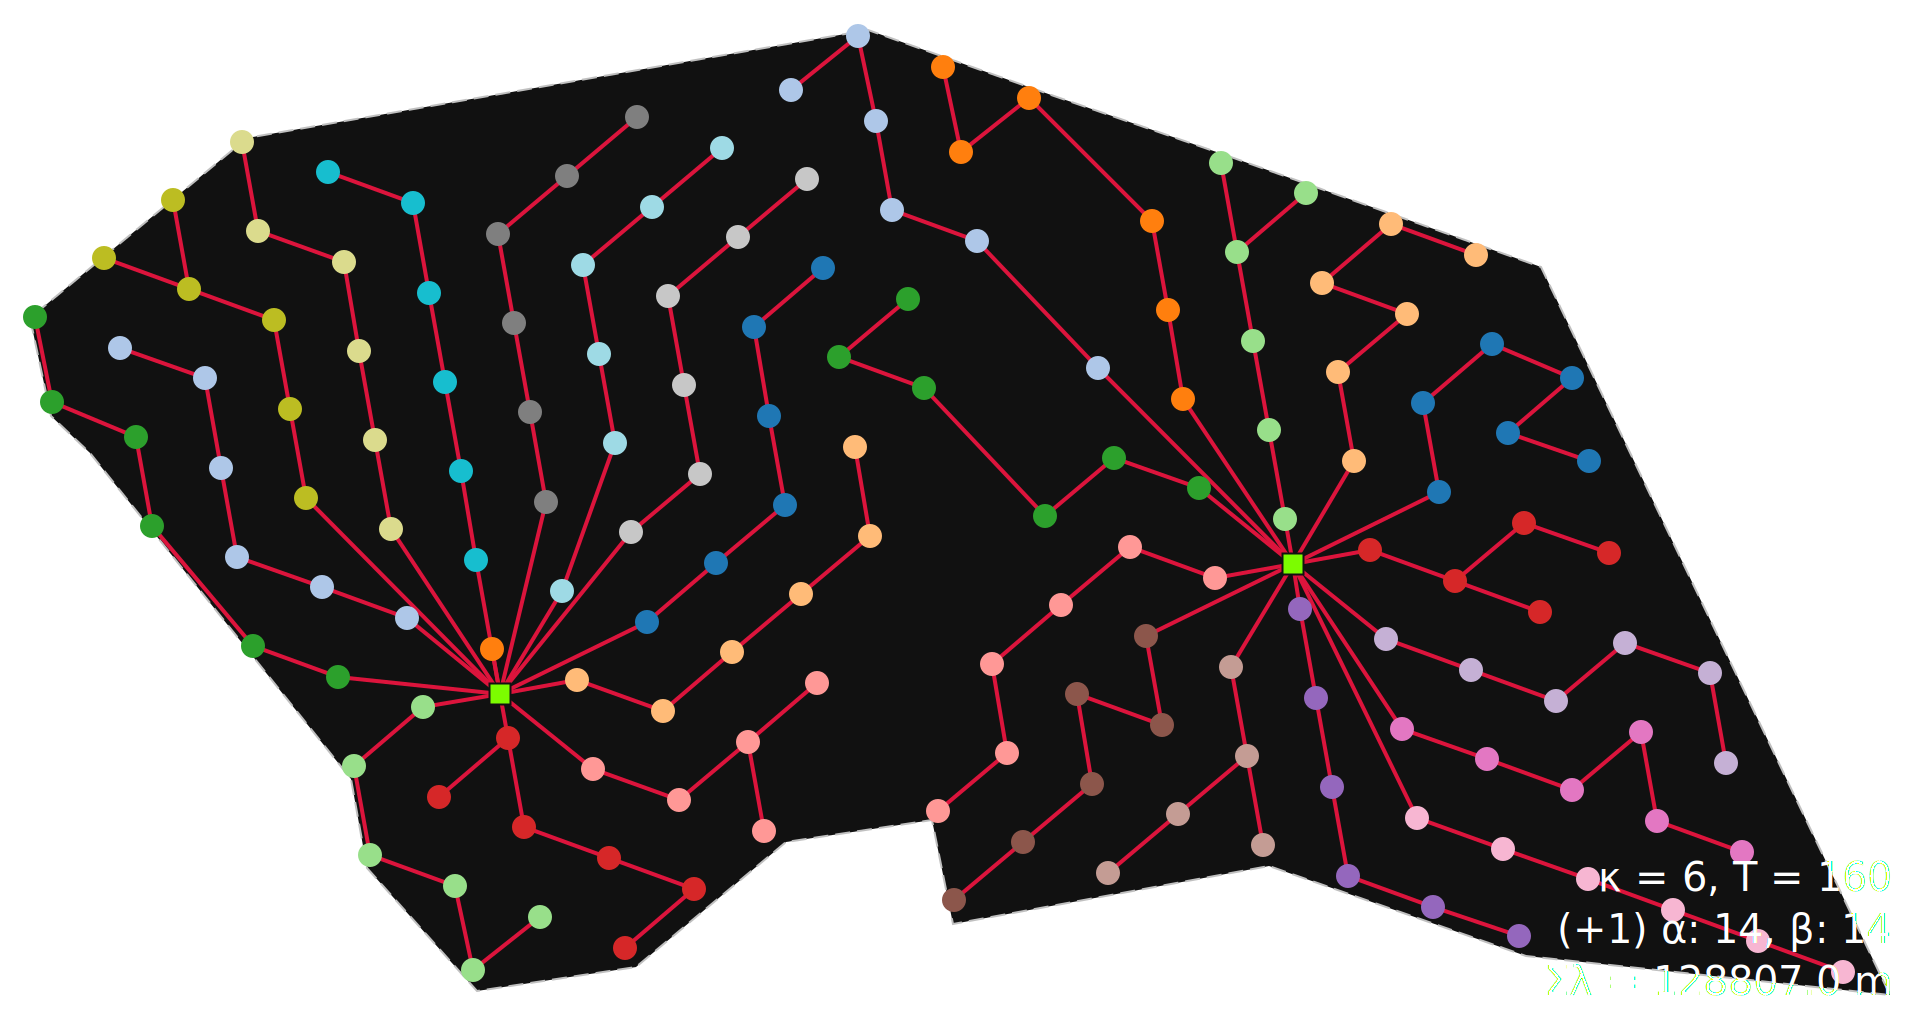

In [11]:
svgplot(G)